# Import Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Gathering Data
Skip this step if you already have the final data

**Jump over modelling step**

In [ ]:
shutil.rmtree('data', ignore_errors=True)

In [ ]:
! mkdir data

## Download Dataset from Kaggle

In [ ]:
! pip install kaggle

### Initialize Kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

### Download shayanriyaz Dataset
Classes (train:val) : BrownSpot (418:105), Healthy (1191:297), Hispa (452:113), LeafBlast (623:156)

In [ ]:
! kaggle datasets download -d shayanriyaz/riceleafs
! mkdir data/shayanriyaz
! unzip riceleafs.zip -d data/shayanriyaz
os.remove('riceleafs.zip')

### Download chandrug Dataset
Classes : Leaf smut (40), Brown spot (40), Blast (80), Blight (80), Tungro (80)

In [ ]:
! kaggle datasets download -d chandrug/riceleafdisease
! mkdir data/chandrug
! unzip riceleafdisease.zip -d data/chandrug
os.remove('riceleafdisease.zip')

### Download tedisetiady Dataset
Classes : Blast (80), Blight (80), Tungro (80)

In [ ]:
! kaggle datasets download -d tedisetiady/leaf-rice-disease-indonesia
! mkdir data/tedisetiady
! unzip leaf-rice-disease-indonesia.zip -d data/tedisetiady
os.remove('leaf-rice-disease-indonesia.zip')

### Download vbookshelf Dataset
Classes : Leaf smut (40), Brown spot (40), Blight (40)

In [ ]:
! kaggle datasets download -d vbookshelf/rice-leaf-diseases
! mkdir data/vbookshelf
! unzip rice-leaf-diseases.zip -d data/vbookshelf
os.remove('rice-leaf-diseases.zip')

## Mixed Dataset

In [ ]:
diseases = ("LeafSmut", "BrownSpot", "Blight", "Blast", "Tungro", "Hispa", "Healthy")
dataset_dir = 'data/mixed'
alldata_dir = 'data/mixed/alldata'

In [ ]:
os.mkdir(dataset_dir)
os.mkdir(alldata_dir)
for disease in diseases:
  os.mkdir(os.path.join(alldata_dir, disease))

In [ ]:
def copy_to_mixed_dataset(base_source_dir, source_list, target_list):
  for index, value in enumerate(source_list):
    dest_dir = os.path.join(alldata_dir, target_list[index])
    source_dir = os.path.join(base_source_dir, source_list[index])
    list_data = os.listdir(source_dir)

    for data in list_data:
      if data in os.listdir(dest_dir):
        continue
      source = os.path.join(source_dir, data)
      dest = os.path.join(dest_dir, data)
      shutil.copy(source, dest)

### Copy shayanriyaz Dataset

#### train dir

In [ ]:
base_source_dir = 'data/shayanriyaz/RiceLeafs/train'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [ ]:
target_list = ['BrownSpot', 'Healthy', 'Hispa', 'Blast']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'Healthy', 'Hispa', 'Blast']


In [ ]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

#### val dir

In [ ]:
base_source_dir = 'data/shayanriyaz/RiceLeafs/validation'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [ ]:
target_list = ['BrownSpot', 'Healthy', 'Hispa', 'Blast']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'Healthy', 'Hispa', 'Blast']


In [ ]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy chandrug Dataset

In [ ]:
base_source_dir = 'data/chandrug/rice-leaf-disease'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['Brown spot', 'Leaf smut', 'blast', 'blight', 'tungro']


In [ ]:
target_list = ['BrownSpot', 'LeafSmut', 'Blast', 'Blight', 'Tungro']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'LeafSmut', 'Blast', 'Blight', 'Tungro']


In [ ]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy tedisetiady Dataset

In [ ]:
base_source_dir = 'data/tedisetiady/'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['blast', 'blight', 'tungro']


In [ ]:
target_list = ['Blast', 'Blight', 'Tungro']
print("Directory destination :", target_list)

Directory destination : ['Blast', 'Blight', 'Tungro']


In [ ]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy vbookshelf Dataset

In [ ]:
base_source_dir = 'data/vbookshelf/rice_leaf_diseases'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [ ]:
target_list = ['Blight', 'BrownSpot', 'LeafSmut']
print("Directory destination :", target_list)

Directory destination : ['Blight', 'BrownSpot', 'LeafSmut']


In [ ]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

## Result Mixed Dataset

In [ ]:
print("Total data from each class disease:")
for disease in diseases:
  list_file = os.listdir(os.path.join(alldata_dir, disease))
  print('{}: {} images'.format(disease, len(list_file)))

Total data from each class disease:
LeafSmut: 80 images
BrownSpot: 603 images
Blight: 200 images
Blast: 939 images
Tungro: 160 images
Hispa: 565 images
Healthy: 1488 images


# Exploratory Data Analysis

show the data distribution

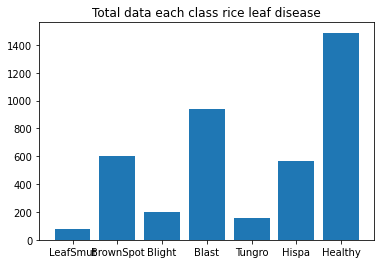

In [ ]:
dict_diseases = {}

for disease in diseases:
  list_file = os.listdir(os.path.join(alldata_dir, disease))
  dict_diseases[disease] = len(list_file)

plt.figure(figsize=(6,4))
plt.bar(x=dict_diseases.keys(), height=dict_diseases.values())
plt.title("Total data each class rice leaf disease")
plt.show()

show example image


LeafSmut


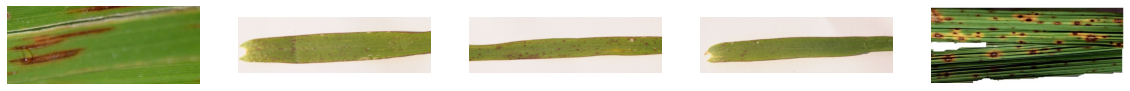


Blast


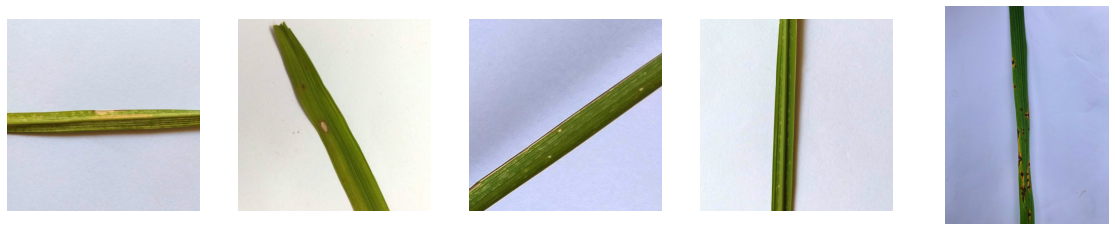


Tungro


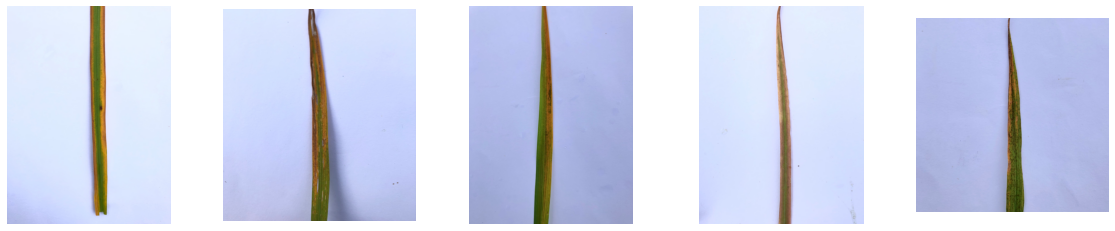


Hispa


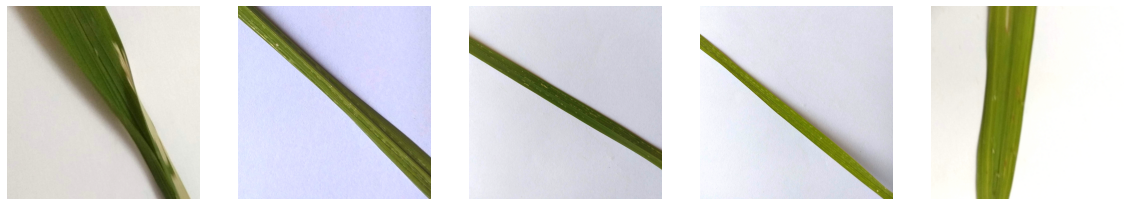


Blight


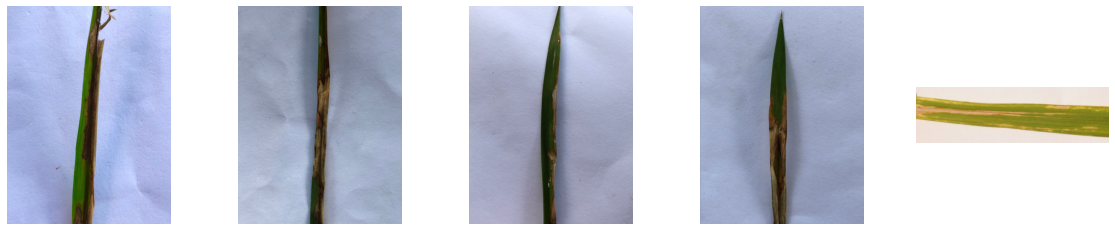


Healthy


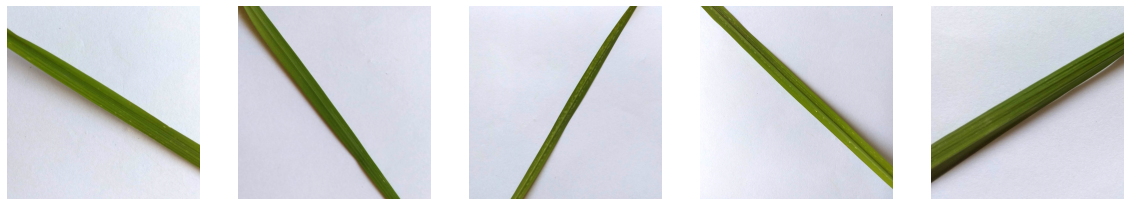


BrownSpot


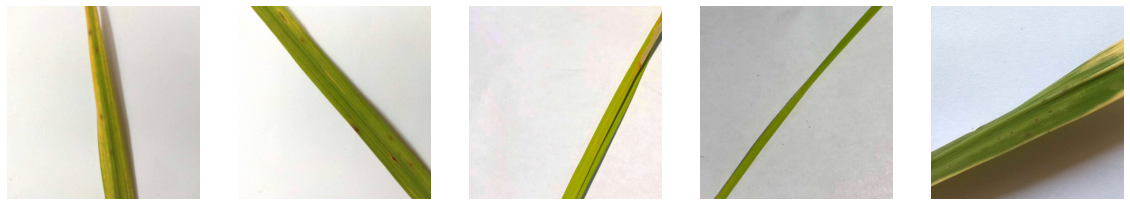

In [ ]:
list_data_class = os.listdir(alldata_dir)
for item in list_data_class:
  print("")
  print(item)
  class_dir = os.path.join(alldata_dir, item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

show minimum and maximum image dimension each class

In [ ]:
list_data_class = os.listdir(alldata_dir)
for item in list_data_class:
  dir = os.path.join(alldata_dir, item)
  print(item)
  
  max_h, min_h, max_w, min_w = 0, 99999, 0, 99999

  for img_name in os.listdir(dir):
    img_path = os.path.join(dir, img_name)
    img = Image.open(img_path)
    
    w, h = img.size
    if w > max_w: max_w = w
    if w < min_w: min_w = w
    if h > max_h: max_h = h
    if h < min_h: min_h = h
  
  print("min width: {} , max width: {}".format(min_w, max_w))
  print("min height: {} , max height: {}".format(min_h, max_h))
  print("")

LeafSmut
min width: 250 , max width: 4160
min height: 71 , max height: 2340

Blast
min width: 734 , max width: 3120
min height: 734 , max height: 3120

Tungro
min width: 1313 , max width: 1970
min height: 1920 , max height: 1920

Hispa
min width: 877 , max width: 3120
min height: 877 , max height: 3120

Blight
min width: 1291 , max width: 3081
min height: 897 , max height: 1920

Healthy
min width: 826 , max width: 3120
min height: 826 , max height: 3120

BrownSpot
min width: 286 , max width: 3120
min height: 88 , max height: 3120



**Conclusion:**

data must be reproduced and resized for better data distribution

# Data Preprocessing & Augmentation

## Load image array and preprocessing image

In [ ]:
def contrast(img):
  """
  increase contrast image
  """
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

  l, a, b = cv2.split(lab)

  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl = clahe.apply(l)
  limg = cv2.merge((cl,a,b))

  enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
  return enhanced_img

def image_pixel_normalization(image):
  """
  transform image to same size without cropping the image
  e.g. image size : (200, 600) => (600, 600)
  """
  h, w, _ = image.shape

  norm_size = h if h > w else w
  
  add_h = norm_size - h
  add_w = norm_size - w 
  
  start_add_h = add_h // 2
  start_add_w = add_w // 2

  new_img = np.full((norm_size, norm_size, 3), 255, dtype=np.uint8)
  new_img[start_add_h:start_add_h + h, start_add_w:start_add_w + w, :] = image
  
  return new_img

def preprocessing(image):
  """
  preprocessing image including size normalization and resize image
  """
  img = image_pixel_normalization(image)
  img = cv2.resize(img, (400, 400), interpolation = cv2.INTER_AREA)
  img = contrast(img)
  return np.array(img)

In [ ]:
def load_image_array(alldata_dir, disease):
  temp_dis_dir = os.path.join(alldata_dir, disease)
  temp_files = os.listdir(temp_dis_dir)
  temp_paths = [os.path.join(temp_dis_dir, file) for file in temp_files]
  temp_imgs = [read_image(file) for file in temp_paths]

  return np.array(temp_imgs)

def read_image(image_file):
  img = cv2.imread(image_file)
  img = preprocessing(img)
  return np.array(img)

In [ ]:
disease_imgs = {}

for disease in diseases:
  disease_imgs[disease] = load_image_array(alldata_dir, disease)
  print(disease, "done") 

disease_imgs.keys()

LeafSmut done
BrownSpot done
Blight done
Blast done
Tungro done
Hispa done
Healthy done


dict_keys(['LeafSmut', 'BrownSpot', 'Blight', 'Blast', 'Tungro', 'Hispa', 'Healthy'])

In [ ]:
disease_imgs['LeafSmut'].shape

(80, 400, 400, 3)

## Augmentating image

In [ ]:
shutil.rmtree('data/mixed/finaldata', ignore_errors=True)

In [ ]:
# final data dir
finaldata_dir = "data/mixed/finaldata"

In [ ]:
os.mkdir(finaldata_dir)
for disease in diseases:
  os.mkdir(os.path.join(finaldata_dir, disease))

### Initialized Image Data Generator Augmentation

In [ ]:
datagen = ImageDataGenerator(
            rotation_range=25, # rotation
            width_shift_range=0.15, # horizontal shift
            height_shift_range=0.15, # vertical shift
            zoom_range=0.1, # zoom
            horizontal_flip=True, # horizontal flip
            vertical_flip=True, # vertical flip
            brightness_range=[0.75,1.25], # brightness
          )

def generate_image(datagen, data, amount, savepath=None):
  # prepare iterator
  it = datagen.flow(
        data, 
        batch_size=1, 
        save_to_dir=savepath,
        save_prefix='',
        save_format='png',
      )
  
  # generate samples and plot
  for i in range(amount):
    it.next()

### Iterate all class diseases and generate new 1000 image data each class

In [ ]:
diseases

('LeafSmut', 'BrownSpot', 'Blight', 'Blast', 'Tungro', 'Hispa', 'Healthy')

In [ ]:
amount = 1000

for idx, disease in enumerate(diseases):
  save_path = os.path.join(finaldata_dir, disease)
  generate_image(datagen, disease_imgs[disease], amount, save_path)
  print("{} (done) : {}".format(disease, len(os.listdir(save_path))))

LeafSmut (done) : 1000
BrownSpot (done) : 1000
Blight (done) : 1000
Blast (done) : 1000
Tungro (done) : 1000
Hispa (done) : 1000
Healthy (done) : 1000


In [ ]:
!zip -r finaldata2.zip data/mixed/finaldata

Streaming output truncated to the last 5000 lines.
  adding: data/mixed/finaldata/Tungro/_149_5635.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_153_3038.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_127_2381.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_16_7161.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_102_4749.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_92_9433.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_66_7487.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_99_7415.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_80_4482.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_76_7282.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_36_1081.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_20_2272.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_4_7506.png (deflated 0%)
  adding: data/mixed/finaldata/Tungro/_33_5782.png (deflated 0%)
  adding: data/mixed/finaldata/Tungr

show result augmented image

In [ ]:
list_data_class = os.listdir(finaldata_dir)
for item in list_data_class:
  print("")
  print(item)
  class_dir = os.path.join(finaldata_dir, item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

# Data Modelling

load final data from drive

In [ ]:
# extract zip file
! unzip "drive/MyDrive/Colab Notebooks/res/finaldata2.zip" -d .

In [4]:
ori_labels = ["LeafSmut", "BrownSpot", "Blight", "Blast", "Tungro", "Hispa", "Healthy"]
# delete label
delete_label = ["Blast", "Hispa"]

if len(delete_label) > 0:
  for label in delete_label:
    shutil.rmtree(os.path.join('data/mixed/finaldata', label), ignore_errors=True)

## Init Method

In [100]:
# define callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set has reached > 99%!")
callbacks = myCallback()

In [101]:
# define method for showing plot learning curves
def plot_learning_curves(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(6, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [103]:
# define confusion matrix
def conf_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)

  ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

  ax.set_title('Confusion Matrix with labels\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(labels, rotation=45)
  ax.yaxis.set_ticklabels(labels, rotation=45)

  plt.show()

In [107]:
def class_report(y_test, y_pred):
  print("Labels: ",train_generator.class_indices)
  print()
  print(classification_report(y_test, y_pred))

## Preparing ImageDataGenerator

In [5]:
finaldata_dir = "data/mixed/finaldata"
img_dim = 150
img_shape = (150, 150, 3)

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.2 
)

batch_size = 100
train_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size =(img_dim,img_dim),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size = (img_dim,img_dim),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation',
    shuffle=False
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [7]:
train_generator.class_indices

{'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

In [8]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)
num_labels = len(labels)

print("Labels: {}".format(labels))
print("Num labels: {}".format(num_labels))

Labels: ['Blight', 'BrownSpot', 'Healthy', 'LeafSmut', 'Tungro']
Num labels: 5


## Model 1

In [9]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=img_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_labels, activation='softmax')  
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [12]:
# fitting model
history1 = model1.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    verbose = 1,
)

Epoch 1/30
40/40 [==============================] - 41s 707ms/step - loss: 1.3459 - accuracy: 0.3683 - val_loss: 1.0074 - val_accuracy: 0.5550
Epoch 2/30
40/40 [==============================] - 29s 722ms/step - loss: 0.9638 - accuracy: 0.5723 - val_loss: 0.8114 - val_accuracy: 0.6550
Epoch 3/30
40/40 [==============================] - 28s 688ms/step - loss: 0.7509 - accuracy: 0.6980 - val_loss: 0.5619 - val_accuracy: 0.8000
Epoch 4/30
40/40 [==============================] - 27s 687ms/step - loss: 0.6627 - accuracy: 0.7565 - val_loss: 0.6553 - val_accuracy: 0.7510
Epoch 5/30
40/40 [==============================] - 27s 684ms/step - loss: 0.4946 - accuracy: 0.8210 - val_loss: 0.4215 - val_accuracy: 0.8450
Epoch 6/30
40/40 [==============================] - 28s 696ms/step - loss: 0.4169 - accuracy: 0.8447 - val_loss: 0.4591 - val_accuracy: 0.8190
Epoch 7/30
40/40 [==============================] - 28s 688ms/step - loss: 0.4079 - accuracy: 0.8453 - val_loss: 0.4051 - val_accuracy: 0.8510

In [13]:
score_train = model1.evaluate(train_generator)
score_valid = model1.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

10/10 [==============================] - 5s 532ms/step - loss: 0.2971 - accuracy: 0.9040
Accuracy (train):  0.9679999947547913
Accuracy (test): 0.9039999842643738
Loss (train):  0.08332625776529312
Loss (test): 0.29707449674606323


### Plot Learning Curves

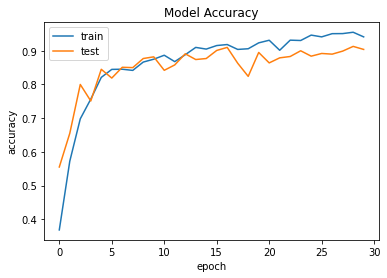

In [14]:
plot_learning_curves(history1)

### Confusion Matrix & Classification Report

In [16]:
y_test = validation_generator.classes
y_pred = model1.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


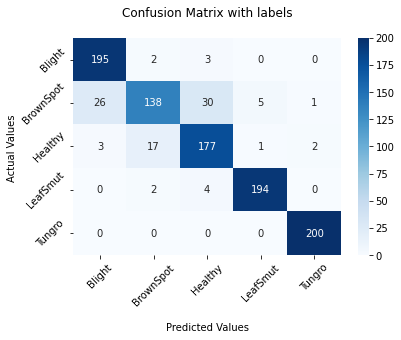

In [17]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [18]:
# show classification report
class_report(y_test, y_pred)

{'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       200
           1       0.87      0.69      0.77       200
           2       0.83      0.89      0.86       200
           3       0.97      0.97      0.97       200
           4       0.99      1.00      0.99       200

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



## Model 2

In [19]:
from tensorflow.keras.applications import ResNet50    # underfit
from tensorflow.keras.applications import ResNet152V2 # overfit

model2 = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=img_shape)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_labels, activation='softmax')  
])

model2.layers[0].trainable = False

model2.summary()

234561536/234545216 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               13107456  
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                     

In [20]:
model2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [22]:
history2 = model2.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    verbose = 1,
)

Epoch 1/30
40/40 [==============================] - 44s 849ms/step - loss: 1.0748 - accuracy: 0.6413 - val_loss: 0.5045 - val_accuracy: 0.7790
Epoch 2/30
40/40 [==============================] - 31s 780ms/step - loss: 0.4842 - accuracy: 0.8037 - val_loss: 0.3993 - val_accuracy: 0.8420
Epoch 3/30
40/40 [==============================] - 31s 774ms/step - loss: 0.3861 - accuracy: 0.8405 - val_loss: 0.4249 - val_accuracy: 0.8410
Epoch 4/30
40/40 [==============================] - 31s 770ms/step - loss: 0.3378 - accuracy: 0.8652 - val_loss: 0.4127 - val_accuracy: 0.8490
Epoch 5/30
40/40 [==============================] - 31s 772ms/step - loss: 0.3076 - accuracy: 0.8773 - val_loss: 0.4013 - val_accuracy: 0.8680
Epoch 6/30
40/40 [==============================] - 31s 776ms/step - loss: 0.2593 - accuracy: 0.8995 - val_loss: 0.3708 - val_accuracy: 0.8700
Epoch 7/30
40/40 [==============================] - 31s 767ms/step - loss: 0.2351 - accuracy: 0.9090 - val_loss: 0.3858 - val_accuracy: 0.8560

In [23]:
score_train = model2.evaluate(train_generator)
score_valid = model2.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

10/10 [==============================] - 6s 610ms/step - loss: 0.4770 - accuracy: 0.8800
Accuracy (train):  0.9975000023841858
Accuracy (test): 0.8799999952316284
Loss (train):  0.01178211160004139
Loss (test): 0.47703009843826294


### Plot Learning Curves

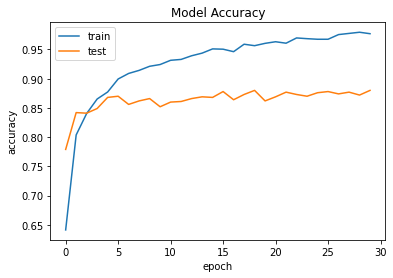

In [24]:
plot_learning_curves(history2)

### Confusion Matrix & Classification Report

In [26]:
y_test = validation_generator.classes
y_pred = model2.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


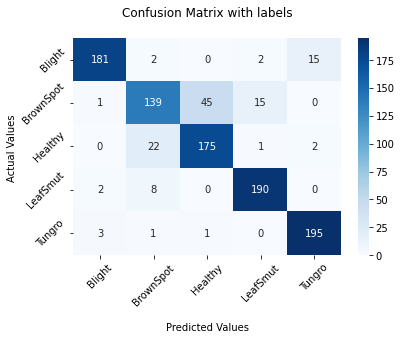

In [27]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [28]:
# show classification report
class_report(y_test, y_pred)

{'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       200
           1       0.81      0.69      0.75       200
           2       0.79      0.88      0.83       200
           3       0.91      0.95      0.93       200
           4       0.92      0.97      0.95       200

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



## Model 3

In [29]:
from tensorflow.keras.applications.densenet import DenseNet121

model3 = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=img_shape),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

model3.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 7,301,189
Trainable params: 7,217,541
Non

In [30]:
model3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [32]:
history3 = model3.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    verbose = 1,
)

Epoch 1/30
40/40 [==============================] - 51s 861ms/step - loss: 0.8916 - accuracy: 0.6538 - val_loss: 1.3062 - val_accuracy: 0.5830
Epoch 2/30
40/40 [==============================] - 32s 801ms/step - loss: 0.2560 - accuracy: 0.9070 - val_loss: 1.1661 - val_accuracy: 0.6880
Epoch 3/30
40/40 [==============================] - 32s 806ms/step - loss: 0.1584 - accuracy: 0.9435 - val_loss: 0.9594 - val_accuracy: 0.7790
Epoch 4/30
40/40 [==============================] - 32s 805ms/step - loss: 0.1205 - accuracy: 0.9538 - val_loss: 0.6590 - val_accuracy: 0.8210
Epoch 5/30
40/40 [==============================] - 32s 799ms/step - loss: 0.0746 - accuracy: 0.9735 - val_loss: 0.4357 - val_accuracy: 0.8780
Epoch 6/30
40/40 [==============================] - 32s 800ms/step - loss: 0.0500 - accuracy: 0.9833 - val_loss: 0.5121 - val_accuracy: 0.8720
Epoch 7/30
40/40 [==============================] - 32s 800ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.3147 - val_accuracy: 0.9190

In [33]:
score_train = model3.evaluate(train_generator)
score_valid = model3.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

10/10 [==============================] - 6s 547ms/step - loss: 0.3087 - accuracy: 0.9470
Accuracy (train):  1.0
Accuracy (test): 0.9470000267028809
Loss (train):  4.475632886169478e-05
Loss (test): 0.30874142050743103


### Plot Learning Curves

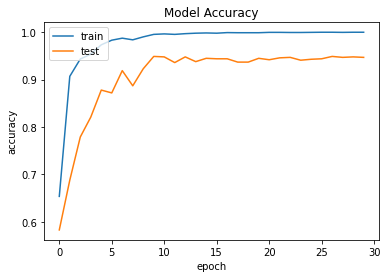

In [34]:
plot_learning_curves(history3)

### Confusion Matrix & Classification Report

In [36]:
y_test = validation_generator.classes
y_pred = model3.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


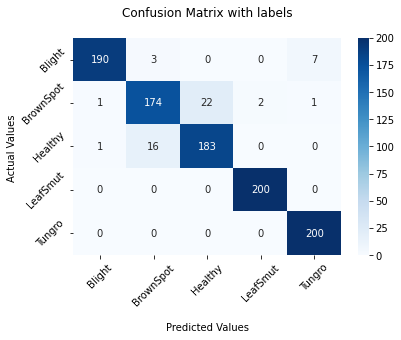

In [37]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [38]:
# show classification report
class_report(y_test, y_pred)

{'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       200
           1       0.90      0.87      0.89       200
           2       0.89      0.92      0.90       200
           3       0.99      1.00      1.00       200
           4       0.96      1.00      0.98       200

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



## Model 4

In [39]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape=img_shape,
                                include_top=False,
                                weights='imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = True

pre_trained_model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                      

In [40]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [41]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dropout(0.6)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(num_labels, activation='softmax')(x) 

model4 = tf.keras.Model(pre_trained_model.input, x)

model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                              

In [42]:
model4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9),
              metrics=['accuracy'])

In [44]:
history4 = model4.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    verbose = 1,
)

Epoch 1/30
40/40 [==============================] - 38s 758ms/step - loss: 1.1371 - accuracy: 0.5245 - val_loss: 0.7648 - val_accuracy: 0.6990
Epoch 2/30
40/40 [==============================] - 29s 726ms/step - loss: 0.4511 - accuracy: 0.8215 - val_loss: 0.3686 - val_accuracy: 0.8600
Epoch 3/30
40/40 [==============================] - 29s 723ms/step - loss: 0.2481 - accuracy: 0.9070 - val_loss: 0.2663 - val_accuracy: 0.8990
Epoch 4/30
40/40 [==============================] - 29s 728ms/step - loss: 0.1685 - accuracy: 0.9385 - val_loss: 0.2327 - val_accuracy: 0.9050
Epoch 5/30
40/40 [==============================] - 29s 722ms/step - loss: 0.1270 - accuracy: 0.9560 - val_loss: 0.2097 - val_accuracy: 0.9290
Epoch 6/30
40/40 [==============================] - 29s 723ms/step - loss: 0.0917 - accuracy: 0.9668 - val_loss: 0.1808 - val_accuracy: 0.9370
Epoch 7/30
40/40 [==============================] - 29s 724ms/step - loss: 0.0708 - accuracy: 0.9743 - val_loss: 0.2441 - val_accuracy: 0.9240

In [45]:
score_train = model4.evaluate(train_generator)
score_valid = model4.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

10/10 [==============================] - 6s 541ms/step - loss: 0.3160 - accuracy: 0.9440
Accuracy (train):  1.0
Accuracy (test): 0.9440000057220459
Loss (train):  6.444897735491395e-05
Loss (test): 0.3160094618797302


### Plot Learning Curves

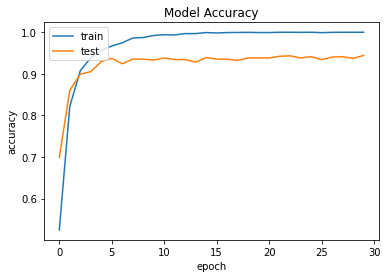

In [46]:
plot_learning_curves(history4)

### Confusion Matrix & Classification Report

In [48]:
y_test = validation_generator.classes
y_pred = model4.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


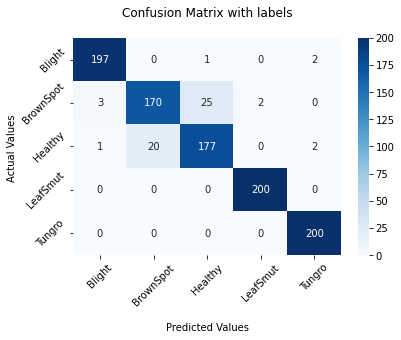

In [49]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [50]:
# show classification report
class_report(y_test, y_pred)

{'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       0.89      0.85      0.87       200
           2       0.87      0.89      0.88       200
           3       0.99      1.00      1.00       200
           4       0.98      1.00      0.99       200

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



## Model 5

In [87]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 

model5 = tf.keras.models.Sequential([
    MobileNetV2(weights="imagenet", include_top=False, input_shape=img_shape),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_labels, activation='softmax')  
])

model5.layers[0].trainable = False

model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 dropout_27 (Dropout)        (None, 5, 5, 1280)        0         
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_45 (Dense)            (None, 1024)              1311744   
                                                                 
 dense_46 (Dense)            (None, 512)               524800    
                                                                 
 dropout_28 (Dropout)        (None, 512)             

In [88]:
model5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [90]:
history5 = model5.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    verbose = 1,
)

Epoch 1/30
40/40 [==============================] - 33s 764ms/step - loss: 1.7293 - accuracy: 0.7103 - val_loss: 1.1649 - val_accuracy: 0.8570
Epoch 2/30
40/40 [==============================] - 27s 678ms/step - loss: 1.0615 - accuracy: 0.8560 - val_loss: 1.0222 - val_accuracy: 0.8520
Epoch 3/30
40/40 [==============================] - 27s 680ms/step - loss: 0.8454 - accuracy: 0.8865 - val_loss: 0.8679 - val_accuracy: 0.8650
Epoch 4/30
40/40 [==============================] - 27s 679ms/step - loss: 0.7253 - accuracy: 0.8935 - val_loss: 0.7536 - val_accuracy: 0.8790
Epoch 5/30
40/40 [==============================] - 27s 681ms/step - loss: 0.6143 - accuracy: 0.9143 - val_loss: 0.7956 - val_accuracy: 0.8190
Epoch 6/30
40/40 [==============================] - 27s 682ms/step - loss: 0.5685 - accuracy: 0.9160 - val_loss: 0.6559 - val_accuracy: 0.8810
Epoch 7/30
40/40 [==============================] - 27s 686ms/step - loss: 0.4966 - accuracy: 0.9268 - val_loss: 0.6158 - val_accuracy: 0.8850

In [91]:
score_train = model5.evaluate(train_generator)
score_valid = model5.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy (test):', score_valid[1])
print('Loss (train): ', score_train[0])
print('Loss (test):', score_valid[0])

10/10 [==============================] - 6s 544ms/step - loss: 0.5721 - accuracy: 0.8850
Accuracy (train):  0.9980000257492065
Accuracy (test): 0.8849999904632568
Loss (train):  0.12978173792362213
Loss (test): 0.5720864534378052


### Plot Learning Curves

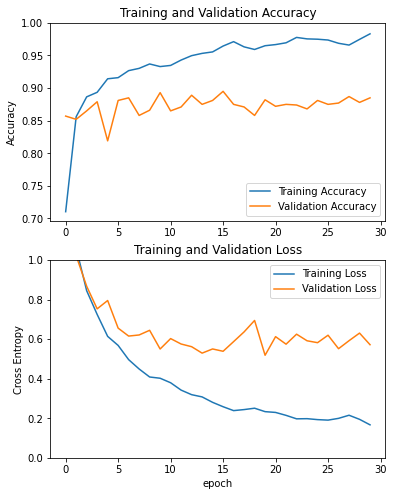

In [102]:
plot_learning_curves(history5)

### Confusion Matrix & Classification Report

In [109]:
y_test = validation_generator.classes
y_pred = model5.predict_generator(validation_generator)
y_pred = tf.argmax(y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


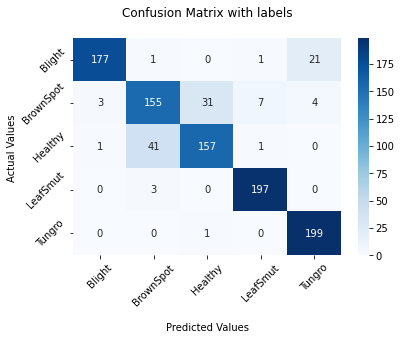

In [104]:
# show confusion matrix
conf_matrix(y_test, y_pred)

In [106]:
# show classification report
class_report(y_test, y_pred)

{'Blight': 0, 'BrownSpot': 1, 'Healthy': 2, 'LeafSmut': 3, 'Tungro': 4}

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       200
           1       0.78      0.78      0.78       200
           2       0.83      0.79      0.81       200
           3       0.96      0.98      0.97       200
           4       0.89      0.99      0.94       200

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.88      1000
weighted avg       0.89      0.89      0.88      1000

